# Embedding Diagrams and Curvature in Schwarzschild

## Python

### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

### Constants

In [281]:
c = 1
M = 1000
G = 1

dr_BK = 1
dt_BK = 1

rcoord = np.arange(3,10)
tcoord = np.arange(3,10)
phicoord = np.linspace(0, 2*np.pi, np.shape(rcoord)[0]*4)

_pi_half = np.true_divide(np.pi, 2)
figure_size = (16,16)

dr_shell_res = 0.1
r_start, r_stop = 3, 100
rcoord = np.linspace(r_start, r_stop,num=int((r_stop-r_start)/dr_shell_res))

general_plot_font = FontProperties()
general_plot_font.set_family('serif')
general_plot_font.set_name('Times New Roman')
general_plot_font.set_size(30)

axes_plot_font = FontProperties()
axes_plot_font.set_family('serif')
axes_plot_font.set_name('Times New Roman')
axes_plot_font.set_size(48)

math_plot_font = FontProperties()
math_plot_font.set_family('serif')
math_plot_font.set_name('Times New Roman')
math_plot_font.set_size(40)

### Shell Measurements

In [4]:
def dr_shell(r_coordinate):
    return np.true_divide(dr_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

def dt_shell(r_coordinate):
    return np.multiply(dt_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

In [187]:
def get_curvature_factor(r_coordinate):
    return np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M))))

## Embedding Diagrams

### Functions

#### Embedding

In [5]:
def create_embedding_figure(ax, BK_coordinate, shell_coordinates, label_angle_offset=0):
    label_offset = (np.sin(_pi_half*label_angle_offset), np.cos(_pi_half*label_angle_offset))
    for phi in phicoord:
        X = np.multiply(BK_coordinate, np.sin(phi))
        Y = np.multiply(BK_coordinate, np.cos(phi))
        Z = shell_coordinates

        ax.plot(X, Y, Z, color='black', alpha=0.3)
    
    for coord, shell in zip(BK_coordinate,shell_coordinates):
        X = np.multiply(coord, np.sin(phicoord))
        Y = np.multiply(coord, np.cos(phicoord))
        Z = shell

        ax.plot(X, Y, Z, color='blue')
        ax.text(coord * label_offset[0], coord * label_offset[1], Z, f'{coord}M', zorder=1)

    ax.set_axis_off()

    return ax

#### Polar

In [6]:
def create_flat_embedding_figure(ax, BK_coordinate, shell_coordinates):
    summed_values = BK_coordinate + shell_coordinates

    for radius in summed_values:
        ax.plot(phicoord, np.multiply(radius, np.ones(np.shape(phicoord)[0])) )
 
    for phi in phicoord:
        angle = np.multiply(phi, np.ones(np.shape(summed_values)[0]))
        ax.plot(angle, summed_values, c='black', alpha=0.5)

    ax.set_rmax(summed_values[-1])
    ax.set_rorigin(2)

    return ax

### Distance

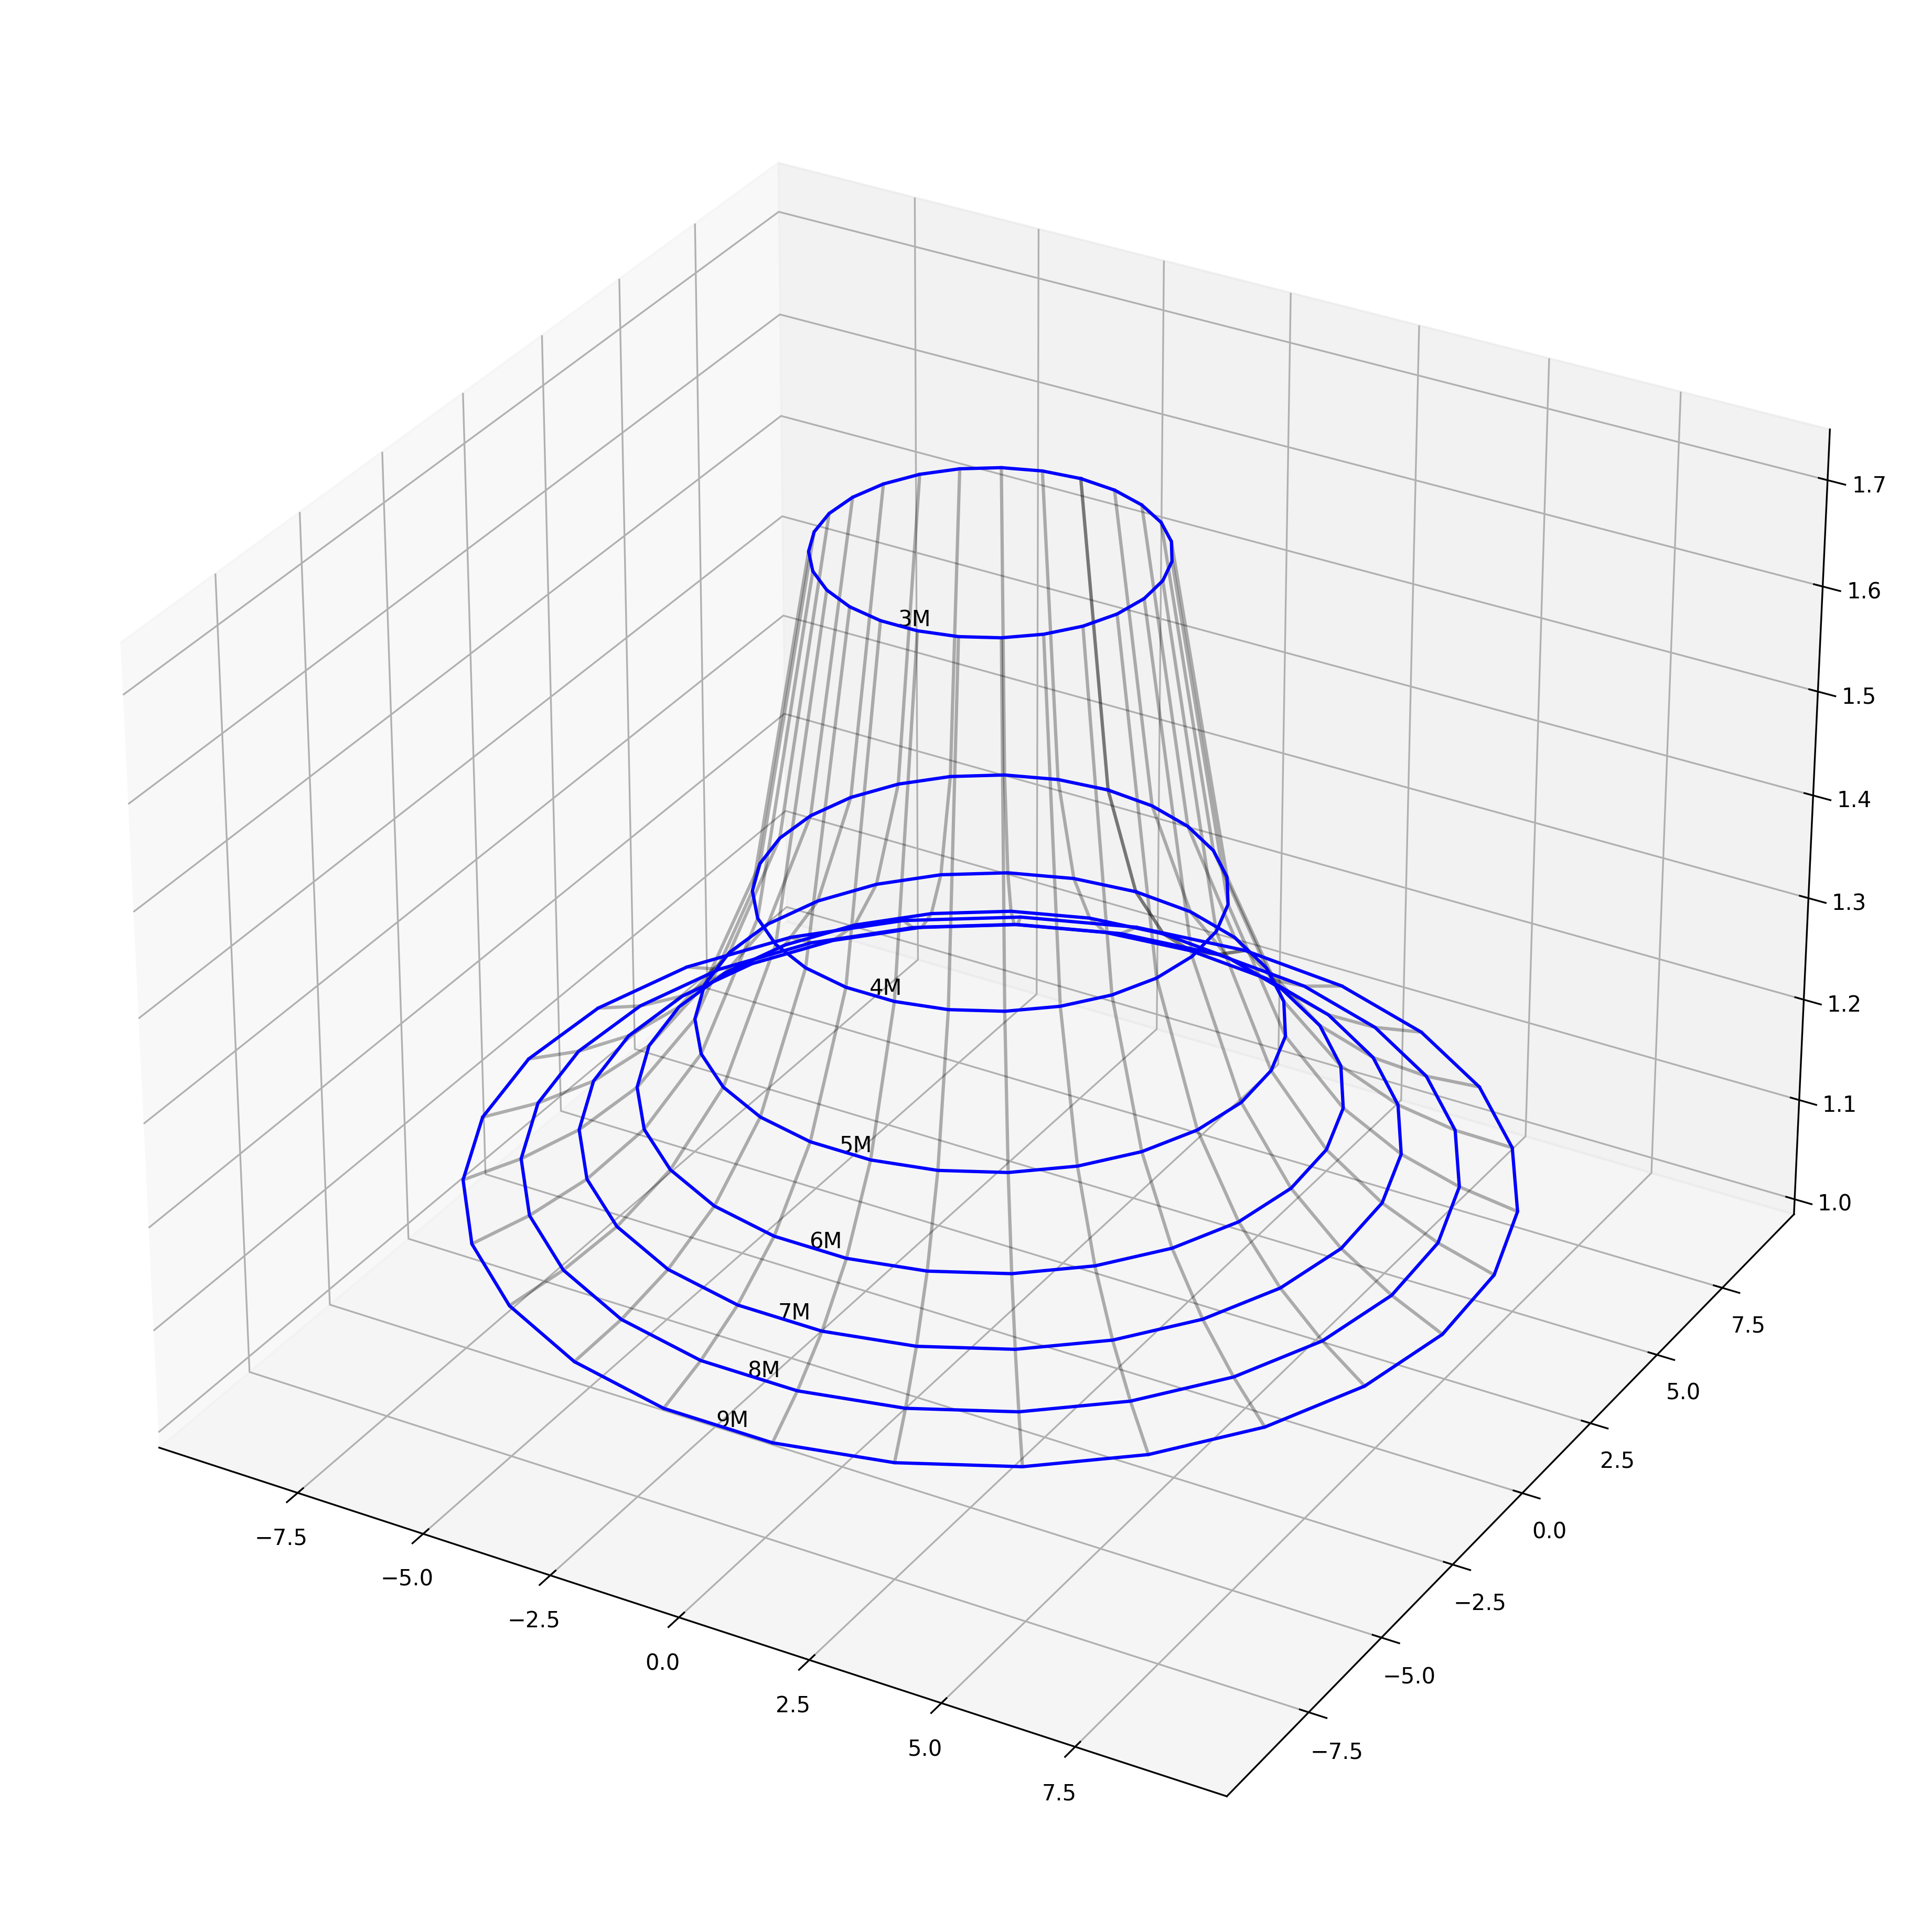

In [7]:
diagram = 'distance'
contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

fig = plt.figure(figsize=figure_size, dpi=300)
ax_embedding = fig.add_subplot(projection='3d')

distance_embedding = create_embedding_figure(ax_embedding, rcoord, contracted_r_coordinates, label_angle_offset=2)
distance_embedding.set_zlim(1,np.max(contracted_r_coordinates))

plt.savefig(f'embedding_diagram_{diagram}.png',bbox_inches='tight')
distance_embedding.set_axis_on()

### Time

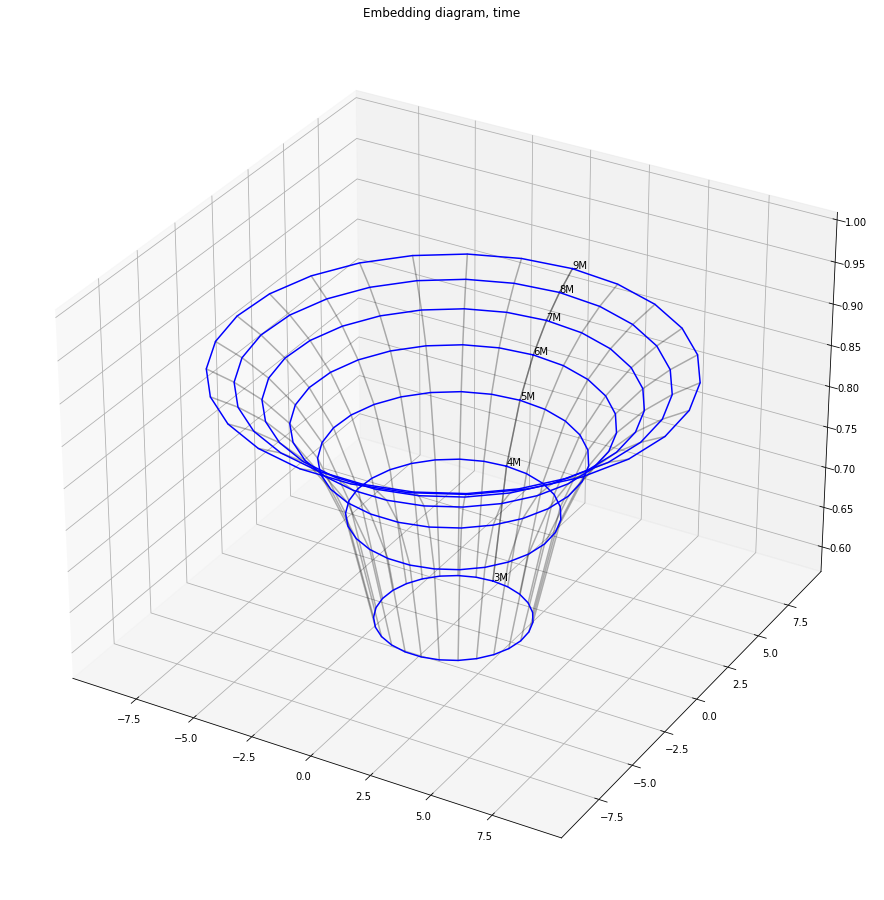

In [8]:
diagram = 'time'
dilated_t_coordinates = dt_shell(r_coordinate=rcoord)

fig = plt.figure(figsize=figure_size)
ax_embedding = fig.add_subplot(projection='3d')

time_embedding = create_embedding_figure(ax_embedding, rcoord, dilated_t_coordinates, label_angle_offset=0)
time_embedding.set_zlim(np.min(dilated_t_coordinates),1)

plt.title(f'Embedding diagram, {diagram}')
plt.savefig(f'embedding_diagram_{diagram}.png')
time_embedding.set_axis_on()

### Polar

In [9]:
# diagram = 'distance'
# contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

# ax_flatpolar = fig.add_subplot(polar=True)

# flat_distance = create_flat_embedding_figure(ax_flatpolar, rcoord, contracted_r_coordinates)

# plt.title(f'Flattened Embedding diagram, {diagram}')
# plt.savefig(f'flat_embedding_diagram_{diagram}.jpg')

### Mixed

In [10]:
# diagram = 'distance'
# contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

# ax_flatpolar = fig.add_subplot(211,polar=True)
# ax_embedding = fig.add_subplot(212,projection='3d')

# flat_distance = create_flat_embedding_figure(ax_flatpolar, rcoord, contracted_r_coordinates)

# angles =[0, 45, 90, 135, 180, 225, 270, 315]
# ax_flatpolar.set_thetagrids(angles, labels=['' for x in angles])

# distance_embedding = create_embedding_figure(ax_embedding, rcoord, contracted_r_coordinates)

# plt.show()

## Curvature Plots

In [11]:
def create_curvature_figure(ax, BK_coordinate, shell_coordinates, plot_info, ):
    ax.set_title(plot_info['title'], fontproperties=plot_info['font']['axes'],)

    ax.set_xlabel(plot_info['x_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20, loc='right')
    ax.set_xlim(plot_info['x_axis']['lim'])
    ax.set_xticks(plot_info['x_axis']['ticks'])
    ax.set_xticklabels(plot_info['x_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.set_ylabel(plot_info['y_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20)
    ax.set_ylim(plot_info['y_axis']['lim'])
    ax.set_yticks(plot_info['y_axis']['ticks'])
    ax.set_yticklabels(plot_info['y_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.plot(BK_coordinate, shell_coordinates)
    return ax

### Length Contraction

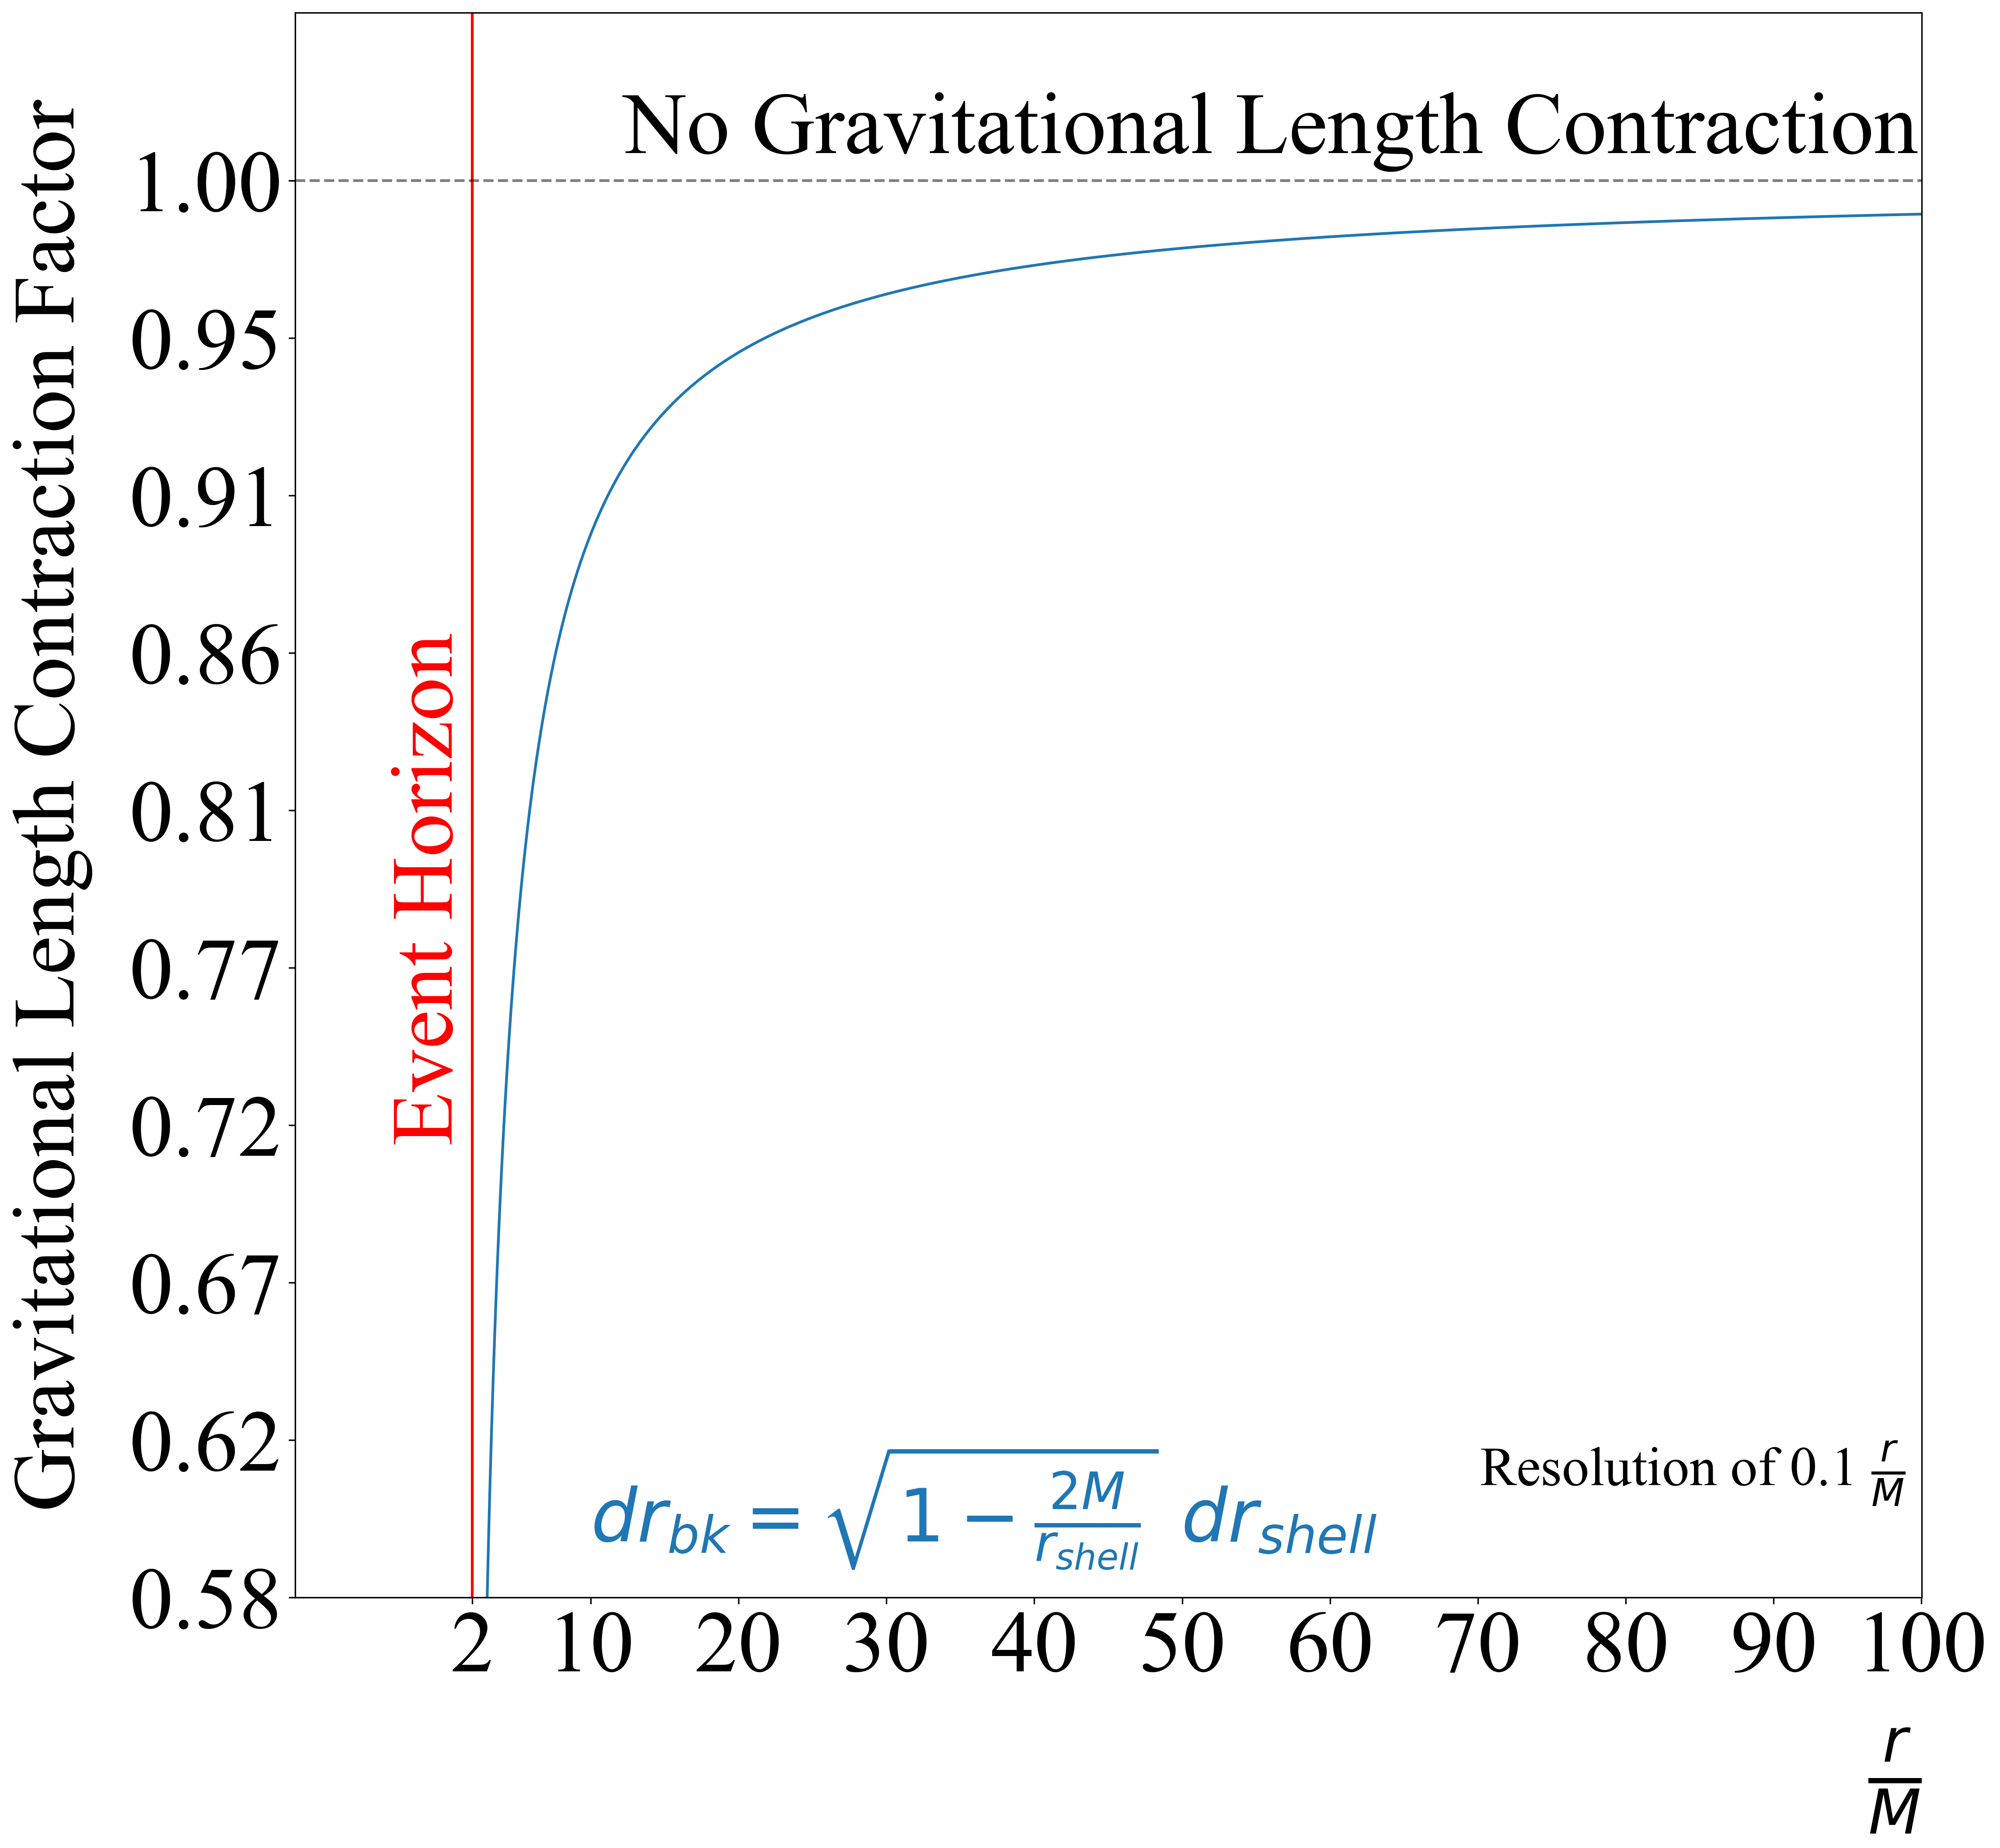

In [282]:
diagram = 'length'
length_contraction_factor = get_curvature_factor(r_coordinate=rcoord)

import math
scale_factor = (1/math.pow(10, -(math.log10(rcoord[-1]) - 1)))

x_offset = 1
x_start = rcoord[0]
y_ticks = length_contraction_factor.tolist()
y_ticks = [length_contraction_factor[tick] for tick in np.arange(0, int((r_stop-r_start)/dr_shell_res), int(scale_factor/dr_shell_res))]

if scale_factor >= 10:
    x_offset = -scale_factor
    x_start = scale_factor
    y_ticks = [tick for tick in np.linspace(length_contraction_factor[0], 1, num=10)]

fig = plt.figure(figsize=figure_size, dpi=300)
ax_curvature = fig.add_subplot()

plot_info = {
    "title" : "",
    "x_axis" : {
        "label" : r"$\frac{r}{M}$",
        "lim" : (x_offset, rcoord[-1]),
        "ticks" : np.insert(np.arange(x_start,rcoord[-1]+1,scale_factor),0,2),
        "tick_labels" : ['2'] + [f'{int(tick)}' for tick in np.arange(x_start,rcoord[-1]+1,scale_factor)],
        "offset" : 0,
    },
    "y_axis" : {
        "label" : "Gravitational Length Contraction Factor",
        "lim" : (length_contraction_factor[0], 1.05),
        "ticks" : [1,] + y_ticks,
        "tick_labels" : ['1.00'] + [f"{tick:1.2f}" for tick in y_ticks],
    },
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

ax_curvature = create_curvature_figure(ax_curvature, rcoord, length_contraction_factor, plot_info,)

# Mark Event Horizon
plt.axvline(
    x=2,
    color="red",
    linestyle="solid"
)
ax_curvature.text(
    1.9,
    np.mean(y_ticks), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['axes'], 
    rotation='vertical', 
    horizontalalignment='right', 
    verticalalignment='center'
)

# Mark Bookkeeper
plt.axhline(
    y=1,
    color="black",
    linestyle="dashed",
    alpha=0.5,
)
ax_curvature.text(
    0.6,
    0.95, 
    "No Gravitational Length Contraction", 
    color="black", 
    fontproperties=plot_info['font']['axes'], 
    horizontalalignment='center', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)

# Annotate Equation
eqn = (r"$dr_{bk}=\sqrt{1-\frac{2M}{r_{shell}}}\ dr_{shell}$")
ax_curvature.text(
    (r_start*scale_factor+x_offset)/(r_stop+abs(x_offset)),
    ((r_stop-r_start)/r_stop)/scale_factor,
    eqn, 
    color="C0", 
    fontproperties=plot_info['font']['math'], 
    horizontalalignment='left', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)

eqn2 = (f"Resolution of {dr_shell_res} "+ r"$\frac{r}{M}$")
ax_curvature.text(
    0.99,
    0.1,
    eqn2,
    color="black", 
    fontproperties=plot_info['font']['general'], 
    horizontalalignment='right', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)
plt.savefig(f'curvature_diagram_{diagram}.jpg',bbox_inches='tight')

### Time Dilation

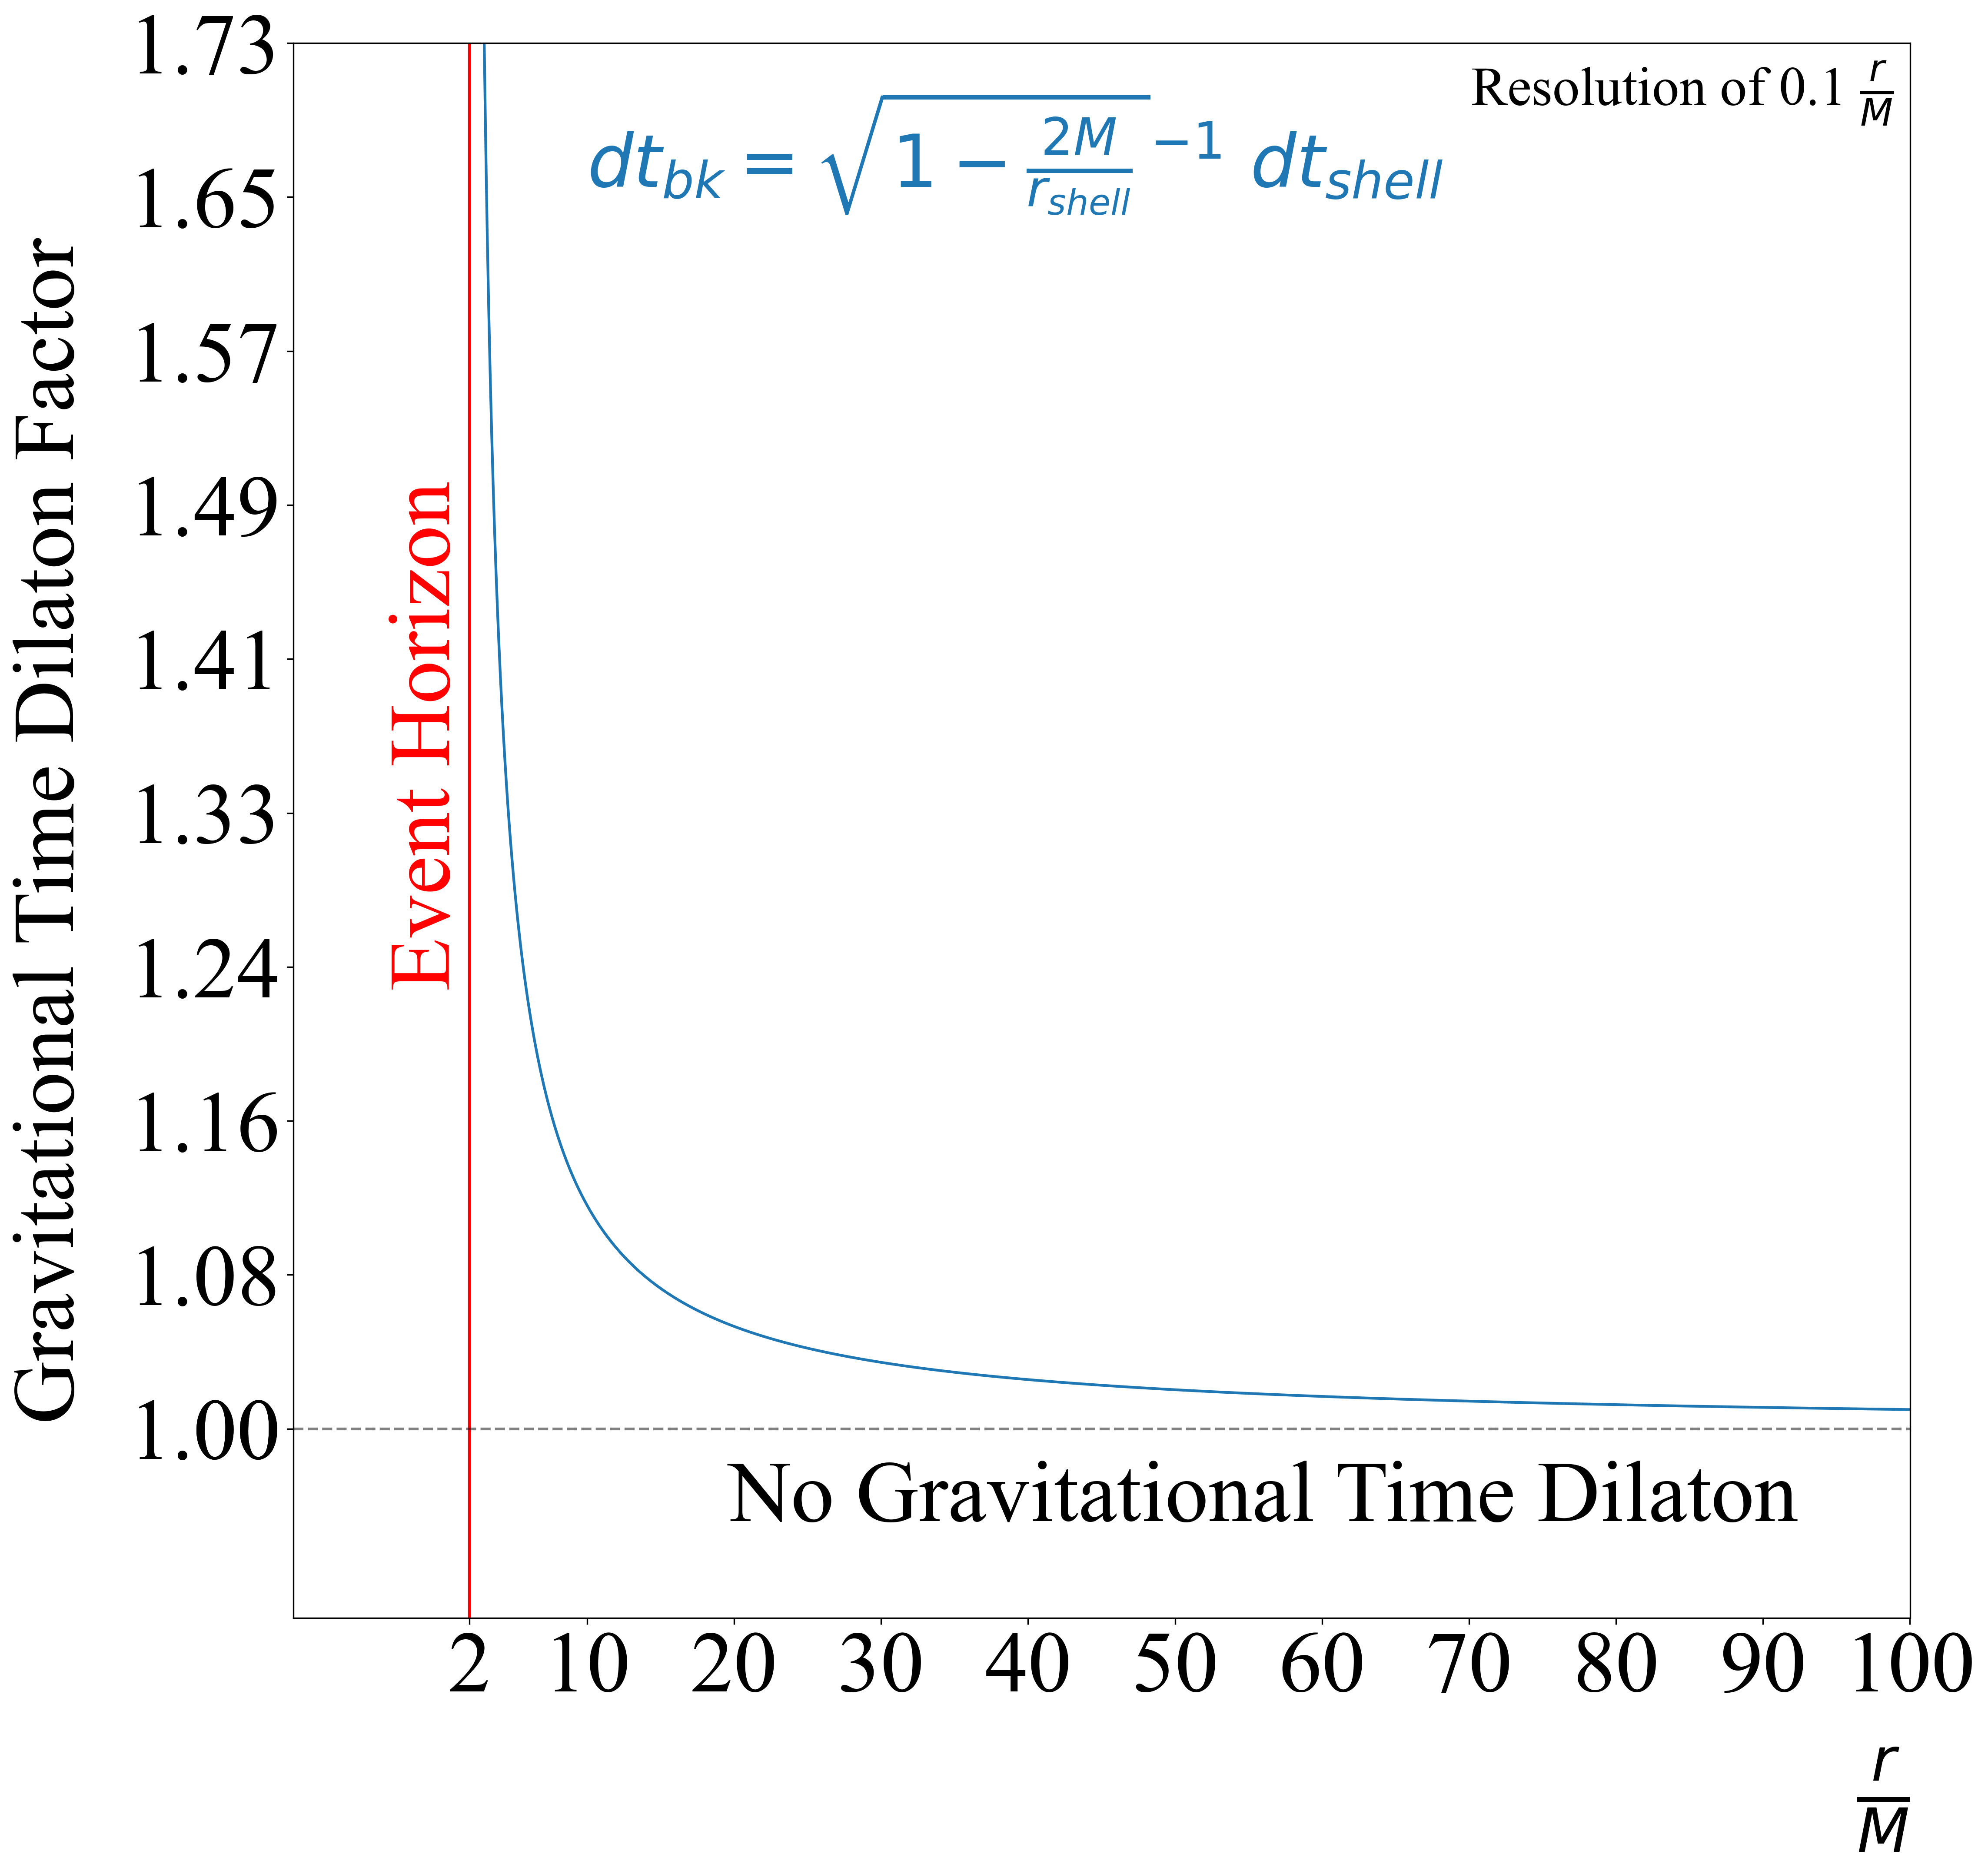

In [285]:
diagram = 'time'
time_dilaton_factor = np.reciprocal(get_curvature_factor(r_coordinate=rcoord))

import math
scale_factor = (1/math.pow(10, -(math.log10(rcoord[-1]) - 1)))

x_offset = 1
x_start = rcoord[0]
y_ticks = time_dilaton_factor.tolist()
y_ticks = [time_dilaton_factor[tick] for tick in np.arange(0, int((r_stop-r_start)/dr_shell_res), int(scale_factor/dr_shell_res))]

if scale_factor >= 10:
    x_offset = -scale_factor
    x_start = scale_factor
    y_ticks = [tick for tick in np.linspace(time_dilaton_factor[0], 1, num=10)]

fig = plt.figure(figsize=figure_size, dpi=300)
ax_curvature = fig.add_subplot()

plot_info = {
    "title" : "",
    "x_axis" : {
        "label" : r"$\frac{r}{M}$",
        "lim" : (x_offset, rcoord[-1]),
        "ticks" : np.insert(np.arange(x_start,rcoord[-1]+1,scale_factor),0,2),
        "tick_labels" : ['2'] + [f'{int(tick)}' for tick in np.arange(x_start,rcoord[-1]+1,scale_factor)],
        "offset" : 0,
    },
    "y_axis" : {
        "label" : "Gravitational Time Dilaton Factor",
        "lim" : (0.9, time_dilaton_factor[0]),
        "ticks" : [1,] + y_ticks,
        "tick_labels" : ['1.00'] + [f"{tick:1.2f}" for tick in y_ticks],
    },
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

ax_curvature = create_curvature_figure(ax_curvature, rcoord, time_dilaton_factor, plot_info,)

# Mark Event Horizon
plt.axvline(
    x=2,
    color="red",
    linestyle="solid"
)
ax_curvature.text(
    1.9,
    np.mean(y_ticks), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['axes'], 
    rotation='vertical', 
    horizontalalignment='right', 
    verticalalignment='center'
)

# Mark Bookkeeper
plt.axhline(
    y=1,
    color="black",
    linestyle="dashed",
    alpha=0.5,
)
ax_curvature.text(
    0.6,
    0.1, 
    "No Gravitational Time Dilaton", 
    color="black", 
    fontproperties=plot_info['font']['axes'], 
    horizontalalignment='center', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)

# Annotate Equation
eqn = (r"$dt_{bk}={\sqrt{1-\frac{2M}{r_{shell}}}}^{-1}\ dt_{shell}$")
ax_curvature.text(
    (r_start*scale_factor+x_offset)/(r_stop+abs(x_offset)),
    (r_stop-r_start)/r_stop,
    eqn, 
    color="C0", 
    fontproperties=plot_info['font']['math'], 
    horizontalalignment='left', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)

eqn2 = (f"Resolution of {dr_shell_res} "+ r"$\frac{r}{M}$")
ax_curvature.text(
    0.99,
    0.99,
    eqn2,
    color="black", 
    fontproperties=plot_info['font']['general'], 
    horizontalalignment='right', 
    verticalalignment='top',
    transform=ax_curvature.transAxes,
)

plt.savefig(f'curvature_diagram_{diagram}.jpg',bbox_inches='tight')